# DBSCAN

## How Does DBSCAN Work?

DBSCAN operates by examining the neighborhood of each point in the dataset. The algorithm follows a step-by-step process to identify clusters based on the density of data points. Let's break down how DBSCAN works:

### 1. Parameter Selection
- **Choose ε (epsilon):** The maximum distance between two points for them to be considered as neighbors.
- **Choose MinPts:** The minimum number of points required to form a dense region.

### 2. Select a Starting Point
- The algorithm starts with an arbitrary unvisited point in the dataset.

### 3. Examine the Neighborhood
- It retrieves all points within the ε distance of the starting point.
- If the number of neighboring points is less than MinPts, the point is labeled as noise (for now).
- If there are at least MinPts points within ε distance, the point is marked as a core point, and a new cluster is formed.

### 4. Expand the Cluster
- All the neighbors of the core point are added to the cluster.
- For each of these neighbors:
  - If it's a core point, its neighbors are added to the cluster recursively.
  - If it's not a core point, it's marked as a border point, and the expansion stops.

### 5. Repeat the Process
- The algorithm moves to the next unvisited point in the dataset.
- Steps 3–4 are repeated until all points have been visited.

### 6. Finalize Clusters
- After all points have been processed, the algorithm identifies all clusters.
- Points initially labeled as noise might now be border points if they're within ε distance of a core point.

### 7. Handling Noise
- Any points not belonging to any cluster remain classified as noise.

---

This process allows DBSCAN to form clusters of arbitrary shapes and identify outliers effectively. The algorithm's ability to find clusters without specifying the number of clusters beforehand is one of its key strengths.

> **Important:** The choice of ε and MinPts can significantly affect the clustering results.  
> In the next section, we'll discuss how to choose these parameters effectively and introduce methods like the k-distance graph for parameter selection.


# 🌌 DBSCAN: Key Concepts and Parameters

To fully understand how DBSCAN forms clusters, we need to explore two foundational ideas:

- **Density Reachability**
- **Density Connectivity**

These concepts define how clusters are formed based on point density rather than shape.

---

## 🔹 Density Reachability

A point **q** is said to be *density-reachable* from a point **p** if:

1. **p is a core point**  
   (i.e., it has at least `MinPts` within ε distance)

2. There exists a chain of points  
   `p = p₁, p₂, ..., pₙ = q`  
   where each point is directly density-reachable from the previous one.

### 💡 Intuition

You can move from **p to q** by stepping through core points,  
where each step is no greater than **ε**.

Think of it like hopping across closely packed stepping stones.

---

## 🔹 Density Connectivity

Two points **p** and **q** are *density-connected* if:

There exists a point **o** such that  
both **p** and **q** are density-reachable from **o**.

### 💡 Why This Matters

Density connectivity is the foundation of cluster formation in DBSCAN.

- All points inside a cluster are **mutually density-connected**
- If a point is density-connected to any cluster member, it becomes part of that cluster

This allows DBSCAN to detect clusters of **arbitrary shapes**.

---

# ⚙️ Choosing DBSCAN Parameters

DBSCAN’s effectiveness depends heavily on two parameters:

- **ε (Epsilon)**
- **MinPts**

Choosing them correctly is crucial.

---

## 🎯 Selecting ε (Epsilon)

ε defines the **maximum distance** for two points to be considered neighbors.

### Methods to Choose ε:

### 1️⃣ Use Domain Knowledge
If you understand what distance is meaningful in your problem,  
use that as your starting point.

---

### 2️⃣ Use a K-Distance Graph (Recommended)

A systematic and reliable approach:

1. Compute the distance to the **k-th nearest neighbor** for each point  
   (where `k = MinPts`)
2. Sort these distances in ascending order
3. Plot them
4. Look for an **"elbow"** in the curve  
   (where the graph sharply changes slope)

👉 The ε value at this elbow is usually a good choice.

---

## 🎯 Selecting MinPts

MinPts determines the **minimum number of points required to form a dense region**.

### Guidelines:

### 1️⃣ General Rule
MinPts ≈ 2 × number_of_features

Example:  
If your dataset has 4 dimensions → Start with MinPts = 8

---

### 2️⃣ Noise Consideration
- If data contains significant noise → decrease MinPts
- If you want to detect very small clusters → decrease MinPts

---

### 3️⃣ Dataset Size
- Large datasets → increase MinPts
- Prevents formation of too many tiny clusters

---

> ⚠️ Parameter selection significantly affects clustering results.  
> It’s best to experiment and evaluate cluster quality.

---

# 📏 Selecting a Distance Metric

DBSCAN relies on a distance metric to measure neighborhood similarity.

### 🔵 Default: Euclidean Distance
Works well for compact, spherical clusters.

However, it may not be ideal for all datasets.

---

## 🔁 Alternative Distance Metrics

You can choose metrics based on data structure:

- **Manhattan (L1 norm)** → Grid-like structured data
- **Cosine** → High-dimensional sparse vectors (e.g., text embeddings)
- **Haversine** → Latitude/longitude geographic coordinates

Choosing the right metric ensures that clustering reflects **true similarity**.

---

## 🧠 In Scikit-Learn

You can specify the metric directly:

```python
DBSCAN(metric='cosine')


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from datetime import datetime


In [3]:
#Data preparation
data=pd.read_csv("/workspaces/master-thesis-declustering-using-ml/Unsupervised-ML/data/mld_final-nz_real_catalog.csv")
data.head()

,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,Hour,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent
0,2,1980-01-01,09:27:04.52,-40.490,174.66901,72.6,3.200,1980-01-01 09:27:04.520,0.099293,1980,...,9,27,4.52,0,0.000217,0.004731,0.045941,-0.633,0.082958,0.041479
1,3,1980-01-01,18:28:10.99,-37.630,176.38000,210.0,4.150,1980-01-01 18:28:10.990,0.475062,1980,...,18,28,10.99,1,0.001304,0.008451,0.154341,-0.950,0.124437,0.082958
2,4,1980-01-01,20:20:54.03,-40.290,173.42999,212.0,4.500,1980-01-01 20:20:54.030,0.553338,1980,...,20,20,54.03,2,0.000038,0.000571,0.066251,-0.350,0.165915,0.124437
3,5,1980-01-02,18:24:15.40,-38.480,176.75000,5.0,3.375,1980-01-02 18:24:15.400,1.472336,1980,...,18,24,15.40,2,0.000047,0.007270,0.006458,0.775,0.000000,0.124437
4,6,1980-01-04,01:21:41.06,-40.906,175.23700,24.1,2.750,1980-01-04 01:21:41.060,2.762216,1980,...,1,21,41.06,3,0.000144,0.010633,0.013547,1.750,0.041479,0.165915


In [4]:
df = data[data["magnitude"] > 4]

df.columns

Index(['event', 'date', 'Time', 'latitude', 'longitude', 'depth', 'magnitude',
       'DateTime', 'time', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'i+', 'N+', 'T+', 'R+', 'dm+', 'n_child', 'n_parent'],
      dtype='str')

In [5]:

df.describe()

,event,latitude,longitude,depth,magnitude,time,Year,Month,Day,Hour,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent
count,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,2.033800e+04,2.033800e+04,20338.000000,20338.000000,20338.000000,20338.000000
mean,174629.921969,-38.483198,109.306081,87.918228,4.415488,8563.437987,2002.955895,6.406677,15.283115,11.472908,29.461599,30.025282,168299.944046,1.817431e-05,6.762991e-01,0.012481,0.566547,0.468465,30.903312
std,130285.865169,3.765442,137.824852,96.847424,0.387550,4579.334018,12.518088,3.492892,8.734544,6.850806,17.314711,17.342664,128997.591931,1.235718e-04,5.220679e+00,0.292268,1.289574,6.190753,95.965102
min,3.000000,-49.165302,-180.000000,0.000000,4.000345,0.475062,1980.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,2.222721e-08,0.000000,-5.494019,0.000000,0.041479
25%,56749.250000,-40.590180,166.842229,12.000000,4.131000,4992.285196,1993.000000,3.000000,8.000000,6.000000,15.000000,14.800000,52478.750000,2.319415e-08,2.981391e-04,0.000014,-0.315953,0.041479,0.082958
50%,143418.500000,-37.711310,175.671910,33.000000,4.300000,8100.162283,2002.000000,7.000000,15.000000,12.000000,29.000000,30.100000,137769.000000,2.647431e-06,4.926126e-03,0.000116,0.357569,0.082958,0.248873
75%,307100.750000,-36.283278,177.576073,158.555450,4.587291,12896.856683,2015.000000,9.000000,22.000000,17.000000,44.000000,45.210000,297813.500000,1.397335e-05,7.192134e-02,0.001078,1.354289,0.248873,2.862040
max,396252.000000,-32.287106,180.638540,750.000000,7.820380,16435.980773,2024.000000,12.000000,31.000000,23.000000,59.000000,59.990000,396166.000000,1.173024e-02,2.761215e+02,39.311853,3.818550,553.825475,553.825475


## Convert DateTime to Numerical Time

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Convert to seconds from first event
df['time_seconds'] = (
    df['DateTime'] - df['DateTime'].min()
).dt.total_seconds()
df

,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent,time_seconds
1,3,1980-01-01,18:28:10.99,-37.630000,176.380000,210.000000,4.150000,1980-01-01 18:28:10.990,0.475062,1980,...,28,10.99,1,0.001304,0.008451,1.543406e-01,-0.950000,0.124437,0.082958,0.000000e+00
2,4,1980-01-01,20:20:54.03,-40.290000,173.429990,212.000000,4.500000,1980-01-01 20:20:54.030,0.553338,1980,...,20,54.03,2,0.000038,0.000571,6.625140e-02,-0.350000,0.165915,0.124437,6.763040e+03
5,7,1980-01-04,01:28:26.60,-36.660000,177.450000,221.000000,4.818000,1980-01-04 01:28:26.600,2.766910,1980,...,28,26.60,5,0.000085,0.000180,4.699059e-01,-2.068000,0.497746,0.041479,1.980156e+05
6,8,1980-01-04,02:29:14.64,-38.710000,175.940000,138.000000,4.011000,1980-01-04 02:29:14.640,2.809132,1980,...,29,14.64,6,0.000002,0.000139,1.472751e-02,0.807000,0.082958,0.497746,2.016636e+05
18,20,1980-01-07,06:34:12.41,-38.690000,175.830000,136.000000,4.743000,1980-01-07 06:34:12.410,5.979245,1980,...,34,12.41,7,0.000007,0.027253,2.581446e-04,-0.732000,0.497746,0.082958,4.755614e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396129,396131,2024-12-25,16:09:52.77,-34.472298,-177.857788,33.000000,5.021488,2024-12-25 16:09:52.770,16430.379018,2024,...,9,52.77,396120,0.000017,0.004428,3.757938e-03,-1.316746,0.041479,0.041479,1.419544e+09
396166,396168,2024-12-27,16:35:42.03,-34.719337,179.310410,187.648285,4.109444,2024-12-27 16:35:42.030,16432.396949,2024,...,35,42.03,396166,0.000028,0.000054,5.218299e-01,-0.985411,0.082958,0.124437,1.419718e+09
396218,396220,2024-12-30,01:55:43.19,-33.308575,-178.069946,33.000000,4.180266,2024-12-30 01:55:43.190,16434.785852,2024,...,55,43.19,394573,0.000004,0.045409,8.310616e-05,2.154414,0.041479,2.281336,1.419924e+09
396239,396241,2024-12-30,21:33:10.43,-34.700241,-179.822449,100.000000,4.070995,2024-12-30 21:33:10.430,16435.603528,2024,...,33,10.43,301612,0.000029,1.649382,1.777235e-05,2.442542,0.041479,3.608659,1.419995e+09


## Select Features for Clustering

In [7]:
features=df[["R+","T+","magnitude","depth"]].copy()
features

,R+,T+,magnitude,depth
1,1.543406e-01,0.008451,4.150000,210.000000
2,6.625140e-02,0.000571,4.500000,212.000000
5,4.699059e-01,0.000180,4.818000,221.000000
6,1.472751e-02,0.000139,4.011000,138.000000
18,2.581446e-04,0.027253,4.743000,136.000000
...,...,...,...,...
396129,3.757938e-03,0.004428,5.021488,33.000000
396166,5.218299e-01,0.000054,4.109444,187.648285
396218,8.310616e-05,0.045409,4.180266,33.000000
396239,1.777235e-05,1.649382,4.070995,100.000000


### Handle Missing / Infinite Values

In [8]:
features = df[['R+', 'T+', 'magnitude', 'depth']].copy()

features = features.replace([np.inf, -np.inf], np.nan).dropna()
df = df.loc[features.index]
features



,R+,T+,magnitude,depth
1,1.543406e-01,0.008451,4.150000,210.000000
2,6.625140e-02,0.000571,4.500000,212.000000
5,4.699059e-01,0.000180,4.818000,221.000000
6,1.472751e-02,0.000139,4.011000,138.000000
18,2.581446e-04,0.027253,4.743000,136.000000
...,...,...,...,...
396129,3.757938e-03,0.004428,5.021488,33.000000
396166,5.218299e-01,0.000054,4.109444,187.648285
396218,8.310616e-05,0.045409,4.180266,33.000000
396239,1.777235e-05,1.649382,4.070995,100.000000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)


# Correlation Heatmap

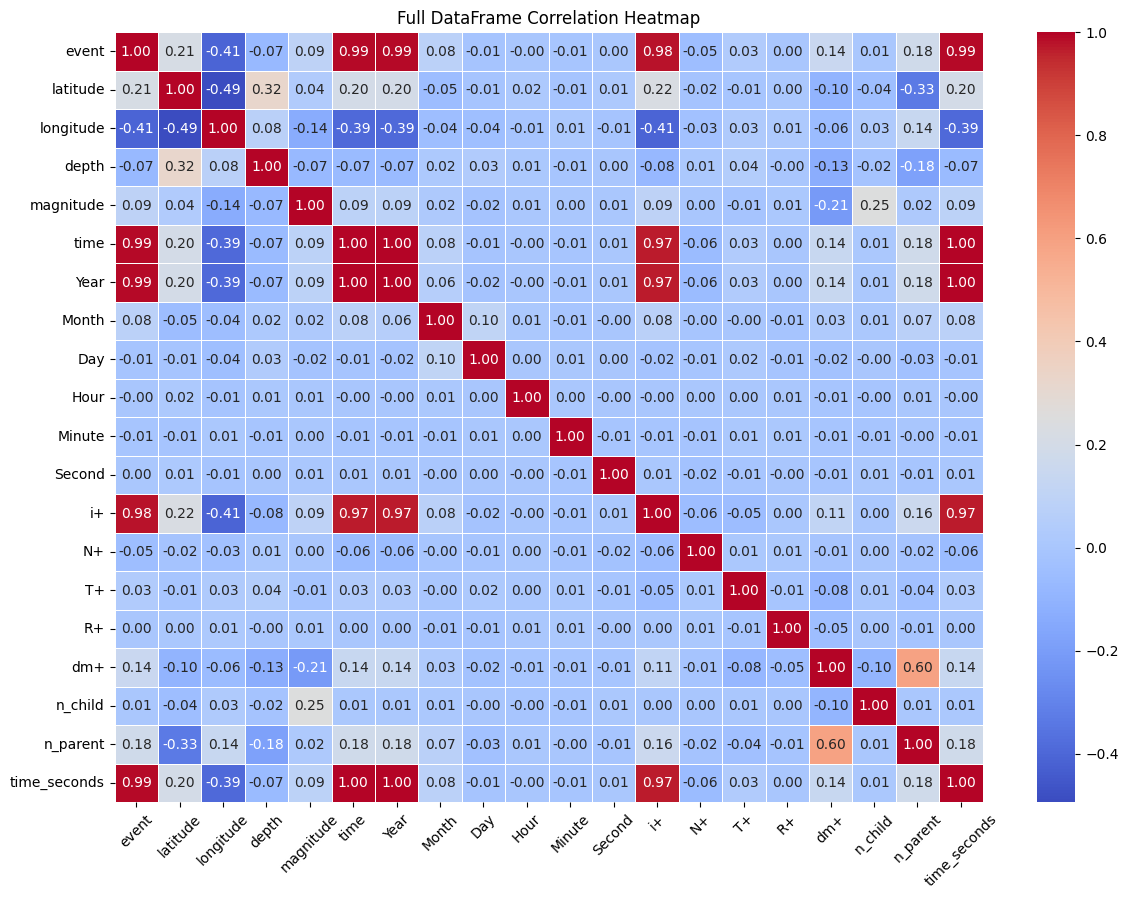

In [10]:

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation
corr_matrix = df_numeric.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)

plt.title("Full DataFrame Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


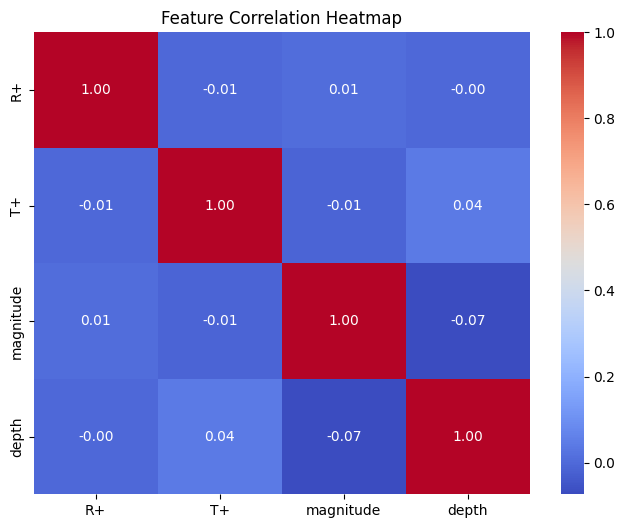

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(features.corr(), 
            annot=True, 
            cmap='coolwarm',
            fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()


## Determine eps Using k-distance Plot

In [12]:
import numpy as np

sample_size = 50000   # safe for memory
indices = np.random.choice(X.shape[0], sample_size)
X_sample = X[indices]


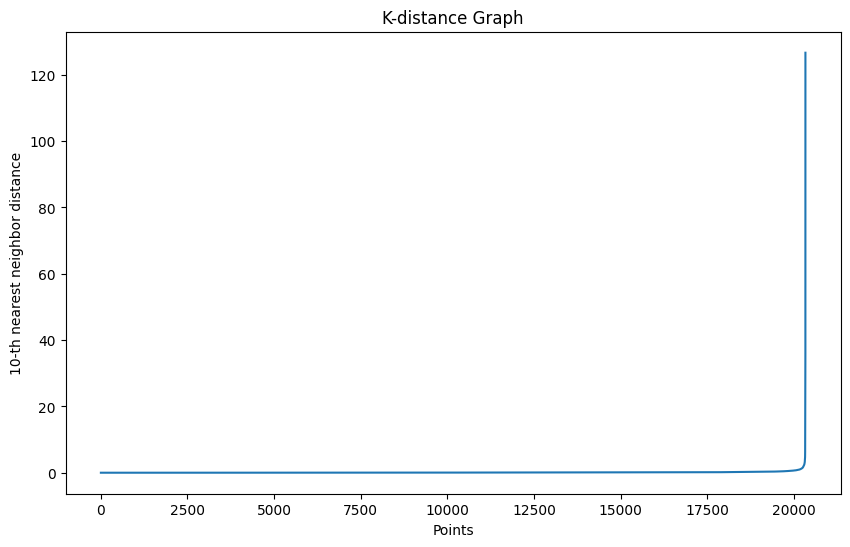

In [13]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X, k=10)

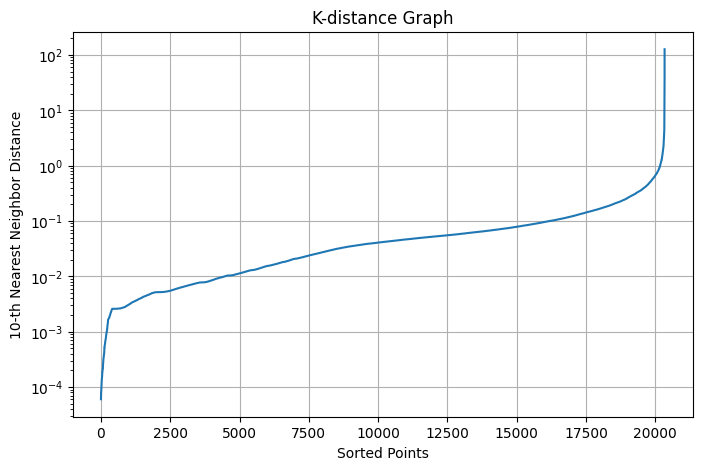

In [14]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(
        n_neighbors=k,
        algorithm='ball_tree'   # faster for large data
    )
    
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    
    distances = np.sort(distances[:, k-1])
    
    plt.figure(figsize=(8,5))
    plt.plot(distances)
    plt.xlabel('Sorted Points')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.yscale('log')  # log scale for better visibility
    plt.title('K-distance Graph')
    plt.grid(True)
    plt.show()

plot_k_distance_graph(X, k=10)


## Outlier in plot

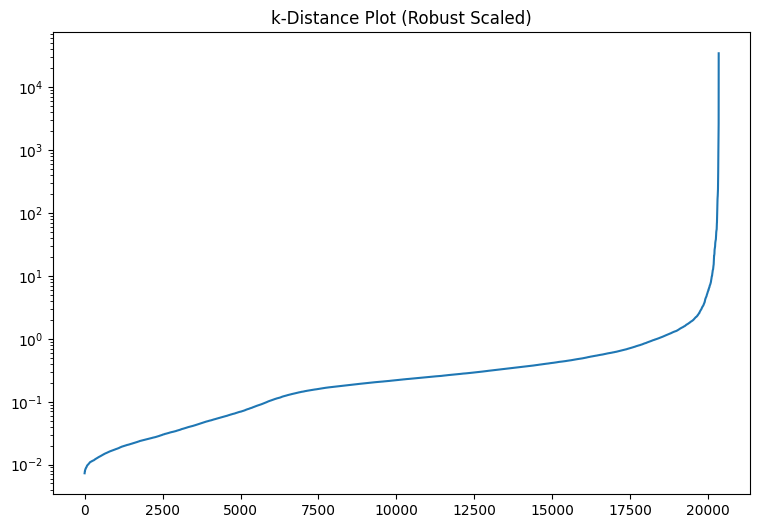

In [15]:
# 1️⃣ Robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ kNN
neighbors = NearestNeighbors(n_neighbors=10)
distances, _ = neighbors.fit(X_scaled).kneighbors(X_scaled)

k_distances = np.sort(distances[:, -1])

# 3️⃣ Plot with log scale
plt.figure(figsize=(9,6))
plt.plot(k_distances)
plt.yscale("log")
plt.title("k-Distance Plot (Robust Scaled)")
plt.show()


In [16]:
log_dist = np.log(k_distances)

grad = np.gradient(log_dist)

spike_index = np.argmax(grad)
spike_value = k_distances[spike_index]

print("Suggested epsilon:", spike_value)


Suggested epsilon: 34793.3983417844


In [17]:
print("Min:", np.min(X_scaled))
print("Max:", np.max(X_scaled))
print("Std:", np.std(X_scaled))


Min: -0.6567195844867113
Max: 36965.778006226785
Std: 142.25524881752904


In [18]:
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors

# ----------------------------
# 1️⃣ Scaling
# ----------------------------
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 2️⃣ kNN distances
# ----------------------------
neighbors = NearestNeighbors(n_neighbors=10)
distances, _ = neighbors.fit(X_scaled).kneighbors(X_scaled)
k_distances = np.sort(distances[:, -1])

# ----------------------------
# 3️⃣ Initial epsilon
# ----------------------------
init_eps = np.percentile(k_distances, 70)

# Function to compute intersection index
def find_index(eps):
    return int(np.searchsorted(k_distances, eps))

# ----------------------------
# 4️⃣ Create Figure
# ----------------------------
fig = go.Figure()

# Main curve
fig.add_trace(go.Scatter(
    x=np.arange(len(k_distances)),
    y=k_distances,
    mode='lines',
    line=dict(width=3, color="#00C9FF"),
    name='k-distance'
))

# Initial intersection
init_idx = find_index(init_eps)

# Horizontal epsilon line
fig.add_shape(
    type="line",
    x0=0,
    x1=len(k_distances),
    y0=init_eps,
    y1=init_eps,
    line=dict(color="red", dash="dash"),
)

# Vertical index line
fig.add_shape(
    type="line",
    x0=init_idx,
    x1=init_idx,
    y0=min(k_distances),
    y1=max(k_distances),
    line=dict(color="orange", dash="dot"),
)

# Annotation
fig.add_annotation(
    x=init_idx,
    y=init_eps,
    text=f"ε = {init_eps:.3f}<br>Index = {init_idx}",
    showarrow=True,
    arrowhead=2,
    bgcolor="black",
    font=dict(color="white")
)

# ----------------------------
# 5️⃣ Slider
# ----------------------------
eps_values = np.linspace(
    np.min(k_distances),
    np.percentile(k_distances, 95),
    80
)

steps = []

for eps in eps_values:
    idx = find_index(eps)

    step = dict(
        method="relayout",
        args=[{
            "shapes[0].y0": eps,
            "shapes[0].y1": eps,
            "shapes[1].x0": idx,
            "shapes[1].x1": idx,
            "annotations[0].x": idx,
            "annotations[0].y": eps,
            "annotations[0].text":
                f"ε = {eps:.3f}<br>Index = {idx}<br>Points ≤ ε: {idx}"
        }],
        label=f"{eps:.2f}"
    )

    steps.append(step)

sliders = [dict(
    active=50,
    currentvalue={"prefix": "Adjust ε: ", "font": {"size": 16}},
    pad={"t": 50},
    steps=steps
)]

# ----------------------------
# 6️⃣ Layout Styling
# ----------------------------
fig.update_layout(
    title={
        "text": "Advanced Interactive DBSCAN ε Selection",
        "x": 0.5
    },
    template="plotly_dark",
    xaxis=dict(
        title="Sorted Points",
        showgrid=True,
        zeroline=False
    ),
    yaxis=dict(
        title="k-NN Distance (log scale)",
        type="log",
        showgrid=True
    ),
    sliders=sliders,
    height=700
)

fig.show()


## End

In [19]:
print(np.isinf(features).sum())
print(np.isnan(features).sum())


R+           0
T+           0
magnitude    0
depth        0
dtype: int64
R+           0
T+           0
magnitude    0
depth        0
dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(
    eps=1.89,
    min_samples=10,
    algorithm='ball_tree'
)

labels = db.fit_predict(X)

df['cluster'] = labels


In [22]:
# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'clusters' is not defined

<Figure size 1000x600 with 0 Axes>

In [21]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Noise points:", n_noise)


Number of clusters: 1
Noise points: 35


## Extract Declustered Catalog

In [ ]:
declustered = []

for cluster_id in df['cluster'].unique():
    
    cluster_events = df[df['cluster'] == cluster_id]
    
    if cluster_id == -1:
        declustered.append(cluster_events)
    else:
        mainshock = cluster_events.loc[
            cluster_events['magnitude'].idxmax()
        ]
        declustered.append(mainshock.to_frame().T)

declustered_df = pd.concat(declustered).reset_index(drop=True)

print("Original:", len(df))
print("Declustered:", len(declustered_df))


# Compare Magnitude Distribution

In [ ]:
plt.figure(figsize=(8,5))

plt.hist(df['magnitude'], bins=30, alpha=0.5, label="Original")
plt.hist(declustered_df['magnitude'], bins=30, alpha=0.5, label="Declustered")

plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude Distribution Comparison")
plt.show()


# Confusion Matrix (With Supervised Labels)

In [ ]:
df['dbscan_label'] = np.where(df['cluster'] == -1, 0, 1)

cm = confusion_matrix(df['supervised_label'], df['dbscan_label'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("DBSCAN")
plt.ylabel("Supervised")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(
    df['supervised_label'],
    df['dbscan_label']
))
